In [1]:
!gdown --id 1n0j5zbMXMVnLPUqadFNcCxiZRu0ChoXL

Downloading...
From: https://drive.google.com/uc?id=1n0j5zbMXMVnLPUqadFNcCxiZRu0ChoXL
To: /content/Programming_Assignment_3.zip
42.0MB [00:00, 101MB/s] 


In [2]:
!unzip "Programming_Assignment_3.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/train/pos/55_9.txt  
  inflating: Dataset/train/pos/550_10.txt  
  inflating: Dataset/train/pos/5500_10.txt  
  inflating: Dataset/train/pos/5501_10.txt  
  inflating: Dataset/train/pos/5502_10.txt  
  inflating: Dataset/train/pos/5503_10.txt  
  inflating: Dataset/train/pos/5504_10.txt  
  inflating: Dataset/train/pos/5505_10.txt  
  inflating: Dataset/train/pos/5506_10.txt  
  inflating: Dataset/train/pos/5507_7.txt  
  inflating: Dataset/train/pos/5508_10.txt  
  inflating: Dataset/train/pos/5509_10.txt  
  inflating: Dataset/train/pos/551_8.txt  
  inflating: Dataset/train/pos/5510_10.txt  
  inflating: Dataset/train/pos/5511_8.txt  
  inflating: Dataset/train/pos/5512_7.txt  
  inflating: Dataset/train/pos/5513_7.txt  
  inflating: Dataset/train/pos/5514_9.txt  
  inflating: Dataset/train/pos/5515_7.txt  
  inflating: Dataset/train/pos/5516_7.txt  
  inflating: Dataset/train/pos/5517_9.txt  
  inflating: Datas

In [3]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
import re
import scipy
import itertools
from scipy.spatial.distance import cdist
from collections import Counter
from random import choice
import math
import glob

In [4]:
#Formulating the train data-set using the text files.

tr_corpus1 = []

tr_files1 = glob.glob("Dataset/train/neg/*.txt")
for file_path in tr_files1:
    with open(file_path, 'r') as file_input:
        tr_corpus1.append(file_input.read())

tr_corpus2 = []

tr_files2 = glob.glob("Dataset/train/pos/*.txt")
for file_path in tr_files2:
    with open(file_path, 'r') as file_input:
        tr_corpus2.append(file_input.read())

tr_df1 = pd.DataFrame(tr_corpus1,columns=['Review'])
tr_df1['Label'] = 0
tr_df2 = pd.DataFrame(tr_corpus2,columns=['Review'])
tr_df2['Label'] = 1

train = pd.concat([tr_df1,tr_df2],ignore_index=True)

In [5]:
#Formulating the test data-set using the text files.

ts_corpus1 = []

ts_files1 = glob.glob("Dataset/test/neg/*.txt")
for file_path in ts_files1:
    with open(file_path, 'r') as file_input:
        ts_corpus1.append(file_input.read())

ts_corpus2 = []

ts_files2 = glob.glob("Dataset/test/pos/*.txt")
for file_path in ts_files2:
    with open(file_path, 'r') as file_input:
        ts_corpus2.append(file_input.read())

ts_df1 = pd.DataFrame(ts_corpus1,columns=['Review'])
ts_df1['Label'] = 0
ts_df2 = pd.DataFrame(ts_corpus2,columns=['Review'])
ts_df2['Label'] = 1

test = pd.concat([ts_df1,ts_df2],ignore_index=True)
test

,Review,Label
0,I really tried to like this film about a docto...,0
1,The biggest problem with this film is that it'...,0
2,This movie had such a good premise to start wi...,0
3,This movie started with some promise: big name...,0
4,This film tells the true story of escaped blac...,0
...,...,...
24995,Spoilers !!! To understand what really happene...,1
24996,"This was a romantic, simple funny movie. I rea...",1
24997,This is an astonishing film: a romantic thrill...,1
24998,Edward Dmytryk directed this shadowy movie abo...,1


# **Preprocessing**

In [6]:
train['Review'] = train['Review'].str.lower() # Ensuring all words in the Tweet column of training data are lowercased
test['Review'] = test['Review'].str.lower() # Ensuring all words in the Tweet column of test data are lowercased

In [7]:
# Parsing the stop_words.txt file and storing all the words in a list.
stopwords = []
with open('Dataset/stop_words.txt','r') as file:    
    for line in file:         
        for word in line.split():            
            stopwords.append(word) 

In [8]:
# Removing all stopwords from all the reviews in training data.
train["Review"] = train["Review"].apply(lambda func: ' '.join(sw 
                                          for sw in func.split() 
                                          if sw not in stopwords))

# Removing all stopwords from all the reviews in test data.
test["Review"] = test["Review"].apply(lambda func: ' '.join(sw 
                                          for sw in func.split() 
                                          if sw not in stopwords))

In [9]:
#List of all special characters that are to be removed.
special_chars = ["!",'"',"%","&","amp","'","(",")", "*","+",",","-",".",
                 "/",":",";","<","=",">","?","[","\\","]","^","_",
                 "`","{","|","}","~","–","@","#","$"]

In [10]:
#Training Data
train['Review'] = train['Review'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') # Removing hyperlinks from all the reviews. They are not needed for classification.
train['Review'] = train['Review'].str.replace('@[A-Za-z0-9]+', '') # Removing usernames from all the reviews.
train['Review'] = train['Review'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') # Removing hashtags, including the text, from all the reviews. Hashtags are useless since their words cannot be splitted with spaces.
train['Review'] = train['Review'].str.replace('\d+', '') # Removing numbers from all the reviews. They will not assist in any way to improve the classification process.

for c in special_chars:
    train['Review'] = train['Review'].str.replace(c,'') # Removing all special characters from all the reviews

#Test Data
test['Review'] = test['Review'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') # Removing hyperlinks from all the reviews
test['Review'] = test['Review'].str.replace('@[A-Za-z0-9]+', '') # Removing usernames from all the reviews.
test['Review'] = test['Review'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') # Removing hashtags, including the text, from all the reviews
test['Review'] = test['Review'].str.replace('\d+', '') # Removing numbers from all the reviews

for c in special_chars:
    test['Review'] = test['Review'].str.replace(c,'') # Removing all special characters from all the reviews

In [11]:
test

,Review,Label
0,really tried like film doctor possibility new ...,0
1,biggest problem film nothing like bruce allmig...,0
2,movie good premise start with suspense slasher...,0
3,movie started promise big name cast good looki...,0
4,film tells true story escaped black slaves fou...,0
...,...,...
24995,spoilers understand really happened first war...,1
24996,romantic simple funny movie really enjoyed wou...,1
24997,astonishing film romantic thriller convoluted ...,1
24998,edward dmytryk directed shadowy movie murder i...,1


# **Features Extraction**

In [12]:
#Dividing training set into train and validation datasets by the ratio 80:20
train = train.sample(frac = 1.0).reset_index(drop=True)
validation = train.iloc[20000:,:]
validation = validation.reset_index()
validation = validation.drop('index',axis=1)
train = train.iloc[0:20000,:]
validation

,Review,Label
0,really truly abysmally garishly awful actor cl...,0
1,film really cool every thing looks like came c...,1
2,refused watch originally aired treasuring memo...,0
3,thomas clay mixing wrong types thats trouble y...,0
4,redeeming features film rubbish jokes begin fu...,0
...,...,...
4995,discussing movie titled snakes plane point ear...,0
4996,read review defending film low budget take thi...,0
4997,sought film new frain fan wanted see work firs...,1
4998,please make forget please please worst film ev...,0


In [13]:
#Reading negative and positive words into lists.

plist = []
with open('Dataset/positive_words.txt','r',encoding = "ISO-8859-1") as file:    
    for line in file:                     
            plist.append(line.split())
poswords = [item for sublist in plist for item in sublist]

nlist = []
with open('Dataset/negative_words.txt','r',encoding = "ISO-8859-1") as file:    
    for line in file:                     
            nlist.append(line.split())
negwords = [item for sublist in nlist for item in sublist]

In [14]:
# Counting negative and positive words in the lexicon for training data.
train['PosCount'] = 0
train['NegCount'] = 0
index = 0
train_poscounts_arr = list()
train_negcounts_arr = list()

for review in train['Review']:
  counter = Counter(train['Review'][index].split())
  poscount = sum(counter[v] for v in set(poswords))
  train_poscounts_arr.append(poscount)
  negcount = sum(counter[v] for v in set(negwords))
  train_negcounts_arr.append(negcount)
  index += 1

train['PosCount'] = train_poscounts_arr
train['NegCount'] = train_negcounts_arr

In [15]:
train

,Review,Label,PosCount,NegCount
0,well answer one personss question why anyone r...,0,10,10
1,movie bad nothing special kid movie serious t...,0,1,4
2,three comments make film discovered hanging fo...,0,14,17
3,the visitors enormous hit france so sequence ...,0,9,16
4,warning contains spoilers br br first all wo...,1,21,12
...,...,...,...,...
19995,good movie still like it cat clovis gold jar w...,1,11,9
19996,easily one worst martial arts films ive ever s...,0,14,46
19997,never seen spike lees prior films trailers nev...,0,15,40
19998,liked moviecute funnyi found film good family ...,1,7,2


In [16]:
# Counting negative and positive words in the lexicon for validation data.
validation['PosCount'] = 0
validation['NegCount'] = 0
index = 0
validation_poscounts_arr = list()
validation_negcounts_arr = list()

for review in validation['Review']:
  counter = Counter(validation['Review'][index].split())
  poscount = sum(counter[v] for v in set(poswords))
  validation_poscounts_arr.append(poscount)
  negcount = sum(counter[v] for v in set(negwords))
  validation_negcounts_arr.append(negcount)
  index += 1

validation['PosCount'] = validation_poscounts_arr
validation['NegCount'] = validation_negcounts_arr

In [17]:
validation

,Review,Label,PosCount,NegCount
0,really truly abysmally garishly awful actor cl...,0,7,12
1,film really cool every thing looks like came c...,1,10,3
2,refused watch originally aired treasuring memo...,0,9,6
3,thomas clay mixing wrong types thats trouble y...,0,3,17
4,redeeming features film rubbish jokes begin fu...,0,5,6
...,...,...,...,...
4995,discussing movie titled snakes plane point ear...,0,13,18
4996,read review defending film low budget take thi...,0,8,5
4997,sought film new frain fan wanted see work firs...,1,24,16
4998,please make forget please please worst film ev...,0,4,9


In [18]:
# Counting negative and positive words in the lexicon for test data.

test['PosCount'] = 0
test['NegCount'] = 0
index = 0
test_poscounts_arr = list()
test_negcounts_arr = list()

for review in test['Review']:
  counter = Counter(test['Review'][index].split())
  poscount = sum(counter[v] for v in set(poswords))
  test_poscounts_arr.append(poscount)
  negcount = sum(counter[v] for v in set(negwords))
  test_negcounts_arr.append(negcount)
  index += 1

test['PosCount'] = test_poscounts_arr
test['NegCount'] = test_negcounts_arr

In [19]:
test

,Review,Label,PosCount,NegCount
0,really tried like film doctor possibility new ...,0,7,9
1,biggest problem film nothing like bruce allmig...,0,5,11
2,movie good premise start with suspense slasher...,0,9,12
3,movie started promise big name cast good looki...,0,11,10
4,film tells true story escaped black slaves fou...,0,12,11
...,...,...,...,...
24995,spoilers understand really happened first war...,1,6,27
24996,romantic simple funny movie really enjoyed wou...,1,15,9
24997,astonishing film romantic thriller convoluted ...,1,19,11
24998,edward dmytryk directed shadowy movie murder i...,1,2,7


In [20]:
# Creating feature matrices for train, validation and test data.

train_feature_df = train[['PosCount','NegCount']]
train_feature_mat = train_feature_df.values.tolist()
train_feature_mat = np.c_[np.ones((20000,1)),train_feature_mat]
train_ls = train['Label'].tolist()
train_labels = np.array(train_ls)

test_feature_df = test[['PosCount','NegCount']]
test_feature_mat = test_feature_df.values.tolist()
test_feature_mat = np.c_[np.ones((25000,1)),test_feature_mat]
test_ls = test['Label'].tolist()
test_labels = np.array(test_ls)

validation_feature_df = validation[['PosCount','NegCount']]
validation_feature_mat = validation_feature_df.values.tolist()
validation_feature_mat = np.c_[np.ones((5000,1)),validation_feature_mat]
validation_ls = validation['Label'].tolist()
validation_labels = np.array(validation_ls)

# **Part 1**

In [21]:
thetas = np.zeros(3) # Initializing an array of weights

#Sigmoid function
def sigmoid(features,thetas):
    z = np.matmul(thetas,features)
    return 1 / (1 + np.exp(-z))

# A function that computes cost. It will be invoked on every epoch.
def CrossEntropyLoss(features,Y,thetas):
    size = Y.size
    J = -(1/size)*np.sum(Y*np.log(sigmoid(features,thetas))+(1-Y)*np.log(1-sigmoid(features,thetas)))
    return J

In [22]:
# Cost before running Gradient Descent
CrossEntropyLoss(train_feature_mat.T,train_labels,thetas)

0.6931471805599453

In [23]:
def gradientDescent(n_epochs,alpha,features,train_labels,thetas,epoch_list):
    J = list()
    m = train_labels.size
    for i in range(n_epochs):
        epoch_list.append(i)
        thetas = thetas - (alpha/m) * np.sum((sigmoid(features,thetas) - train_labels)*features,axis=1)
        J.append(CrossEntropyLoss(features, train_labels, thetas))

    return thetas,J

##**Training Cost**

In [24]:
train_epochs = list()
train_weights,train_J = gradientDescent(125,0.01,train_feature_mat.T,train_labels,thetas,train_epochs)
print("Minimum Cost on Training Data: {}".format(train_J[-1]))
print("Array of learned parameters: {}".format(train_weights))

Minimum Cost on Training Data: 0.5619783322561447
Array of learned parameters: [-0.01676484  0.18121883 -0.18219439]


##**Validation Set Cost**

In [25]:
validation_epochs = list()
validation_weights,validation_J = gradientDescent(125,0.01,validation_feature_mat.T,validation_labels,thetas,validation_epochs)
print("Minimum Cost on Validation Data: {}".format(validation_J[-1]))
print("Array of learned parameters: {}".format(validation_weights))

Minimum Cost on Validation Data: 0.5563591499205088
Array of learned parameters: [-0.02062671  0.18483243 -0.18610275]


##**Predicting Test Cost**

In [26]:
test_cost = CrossEntropyLoss(test_feature_mat.T,test_labels,validation_weights)
print("Cost on Test Data with learned parameters: {}".format(test_cost))

Cost on Test Data with learned parameters: 0.5630904206574887


In [27]:
probs = sigmoid(test_feature_mat.T, validation_weights)
probs

array([0.4008981 , 0.24166097, 0.35655047, ..., 0.80908247, 0.27814513,
       0.44755847])

In [28]:
count = 0
for i in probs:
  
  if i > 0.5:
    probs[count] = 1
  else:
    probs[count] = 0
  count += 1

pred_labels = np.array(probs, dtype=int)
pred_labels

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
acc = 0
for i in range(25000):
  if test_labels[i] == pred_labels[i]:
    acc += 1

accuracy = (acc/25000)*100
print("Accuracy calculated manually: {}%".format(accuracy))

Accuracy calculated manually: 73.292%


In [30]:
test['Predicted Label'] = pred_labels
test

,Review,Label,PosCount,NegCount,Predicted Label
0,really tried like film doctor possibility new ...,0,7,9,0
1,biggest problem film nothing like bruce allmig...,0,5,11,0
2,movie good premise start with suspense slasher...,0,9,12,0
3,movie started promise big name cast good looki...,0,11,10,1
4,film tells true story escaped black slaves fou...,0,12,11,1
...,...,...,...,...,...
24995,spoilers understand really happened first war...,1,6,27,0
24996,romantic simple funny movie really enjoyed wou...,1,15,9,1
24997,astonishing film romantic thriller convoluted ...,1,19,11,1
24998,edward dmytryk directed shadowy movie murder i...,1,2,7,0


In [31]:
testfreqdf = test.groupby(["Label", "Predicted Label"]).size().reset_index(name="Frequency")
testfreqdf

,Label,Predicted Label,Frequency
0,0,0,9016
1,0,1,3484
2,1,0,3193
3,1,1,9307


In [32]:
# Making a general structure of our confusion matrix
cmatrix = pd.DataFrame({'Actual Positive': '', 'Actual Negative': ''},
                       index = ['Predicted Positive','Predicted Negative'])

In [33]:
cmatrix['Actual Positive']['Predicted Positive'] = testfreqdf['Frequency'][3]
cmatrix['Actual Negative']['Predicted Positive'] = testfreqdf['Frequency'][1]
cmatrix['Actual Positive']['Predicted Negative'] = testfreqdf['Frequency'][2]
cmatrix['Actual Negative']['Predicted Negative'] = testfreqdf['Frequency'][0]

In [34]:
#Extracting all three True Positives from the matrix to measure accuracy.
TP = cmatrix['Actual Positive']['Predicted Positive']
TN = cmatrix['Actual Negative']['Predicted Negative']
total = testfreqdf['Frequency'].sum()
accuracy = ((TP + TN)/total)*100
accuracy = round(accuracy,2)

#Extracting all recalls from the matrix to measure macroaveraged recall.
recall_pos = cmatrix['Actual Positive']['Predicted Positive']/cmatrix['Actual Positive'].sum()
recall_neg = cmatrix['Actual Negative']['Predicted Negative']/cmatrix['Actual Negative'].sum()
macroaveraged_recall = ((recall_pos + recall_neg)/2)*100
macroaveraged_recall = round(macroaveraged_recall,2)

#Extracting all precisions from the matrix to measure macroaveraged precision.
precision_pos = cmatrix['Actual Positive']['Predicted Positive']/(cmatrix.iloc[0,0:2].sum())
precision_neg = cmatrix['Actual Negative']['Predicted Negative']/(cmatrix.iloc[1,0:2].sum())
macroaveraged_precision = ((precision_pos + precision_neg)/2)*100
macroaveraged_precision = round(macroaveraged_precision,2)

#Extracting all F1_scores from the matrix to measure macroaveraged F1_score.
F1_pos = (2*precision_pos*recall_pos)/(precision_pos+recall_pos)
F1_neg = (2*precision_neg*recall_neg)/(precision_neg+recall_neg)
F1_score = ((F1_pos + F1_neg)/2)*100  
F1_score = round(F1_score,2)

print("\nConfusion Matrix:\n")
print(cmatrix)
print("\nAccuracy: {}%".format(accuracy))
print("Macroaveraged Precision: {}%".format(macroaveraged_precision))
print("Macroaveraged Recall: {}%".format(macroaveraged_recall))
print("Macroaveraged F1-score: {}%".format(F1_score))


Confusion Matrix:

                   Actual Positive Actual Negative
Predicted Positive            9307            3484
Predicted Negative            3193            9016

Accuracy: 73.29%
Macroaveraged Precision: 73.3%
Macroaveraged Recall: 73.29%
Macroaveraged F1-score: 73.29%


Text(0, 0.5, 'Cross Entropy Loss')

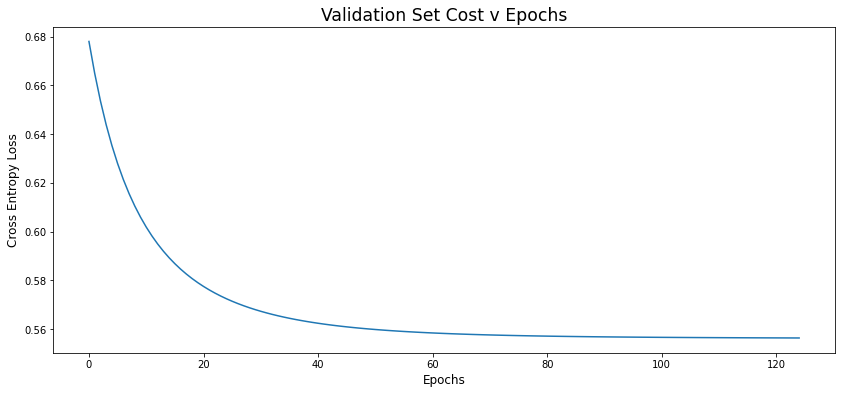

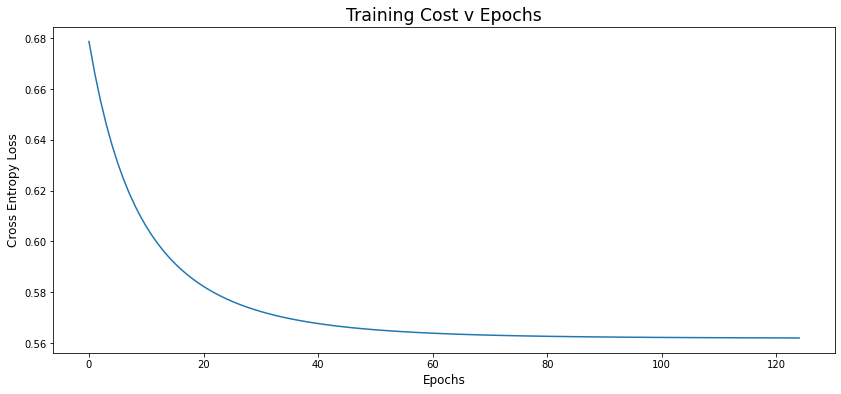

In [35]:
fig = pyplot.figure(figsize=(14,6))
pyplot.plot(validation_epochs,validation_J)
pyplot.title("Validation Set Cost v Epochs",fontsize='xx-large')
pyplot.xlabel("Epochs",fontsize='large')
pyplot.ylabel("Cross Entropy Loss",fontsize='large')

fig = pyplot.figure(figsize=(14,6))
pyplot.plot(train_epochs,train_J)
pyplot.title("Training Cost v Epochs",fontsize='xx-large')
pyplot.xlabel("Epochs",fontsize='large')
pyplot.ylabel("Cross Entropy Loss",fontsize='large')

#**Part 2**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix

classifier = LogisticRegression()
classifier.fit(train_feature_mat,train_labels)
predicted_classes = classifier.predict(test_feature_mat)
test_accuracy = accuracy_score(test_labels,predicted_classes)
test_accuracy = (round(test_accuracy,2))*100

confusion_mat = confusion_matrix(test_labels,predicted_classes)

print("\nConfusion Matrix:\n")
print(confusion_mat)
print("\nAccuracy Score: {}%".format(test_accuracy))


Confusion Matrix:

[[9149 3351]
 [3382 9118]]

Accuracy Score: 73.0%
